#Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#Importing the dataset

In [5]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
X=df.iloc[:,3:].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

 **k-Means**
Before heading down to the analysis, let's try to capture the depth of this beautiful and simple algorithm. The idea of this algorithm is as follows: 

@You start with a centroid randomly and provide the number of clusters to be initialized. This value is called 'k', hence the name k-Means. 

@Using the distance measure to this centroid, you group an incoming instance.

@Based on step 2, you update the centroid again of each cluster based on their distance.
@Iteratively perform 2 and 3 until the centroids stop changing

#Appling the k-means clustering

In [14]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)




**Inertia:**-
It is the mean squared distance between each instance and its closest centroid. The lower this value, the the more denser the cluster is. But is this always a good measure? As the number of clusters increases this value will always decrease. Hence inertia is heavily dependent on the value of k as well. How do we decide on a value for k?

**Elbow plot**
Plotting inertia vs number of clusters will reveal a much more informative plot. We can see that there is an elbow at k = 5. After k = 5, the distortion score approaches saturation and this suggests that an optimal k could be k = 5. But this approach is sort of brute force and of course computationally expensive as you have to run the model multiple times with different k.

#plotting the elbow method

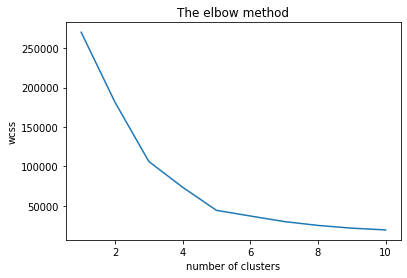

In [17]:
plt.plot(range(1,11),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('The elbow method')
plt.show()

In [23]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_means=kmeans.fit_predict(X)
print(y_means)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


#pltting the optimal number of clusters 

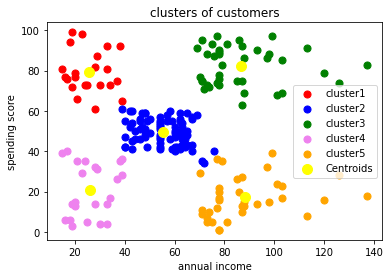

In [22]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s=50, c='red', label='cluster1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s=50, c='blue', label='cluster2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s=50, c='green', label='cluster3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s=50, c='violet', label='cluster4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s=50, c='orange', label='cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.title('clusters of customers')
plt.show()


#Applying hierarchical clustering

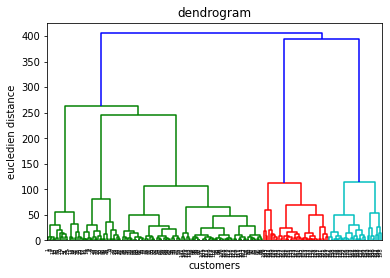

In [27]:
import scipy.cluster.hierarchy as sch
dendrograms= sch.dendrogram(sch.linkage(X,method='ward'))
plt.xlabel('customers')
plt.ylabel('eucledien distance')
plt.title('dendrogram')
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


#plotting the agglomerative clustering  

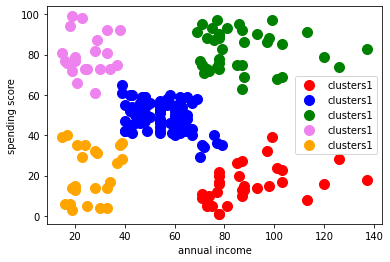

In [32]:
plt.scatter(X[y_hc == 0, 0],X[y_hc == 0,1], s=100 ,c='red', label='clusters1')
plt.scatter(X[y_hc == 1, 0],X[y_hc == 1,1], s=100 ,c='blue', label='clusters1')
plt.scatter(X[y_hc == 2, 0],X[y_hc == 2,1], s=100 ,c='green', label='clusters1')
plt.scatter(X[y_hc == 3, 0],X[y_hc == 3,1], s=100 ,c='violet', label='clusters1')
plt.scatter(X[y_hc == 4, 0],X[y_hc == 4,1], s=100 ,c='orange', label='clusters1')
plt.legend()
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()



 **Beyond k-Means**
**What are the limitations of k-Means?**

1.Dependency on k and on initial value assignment: There is a heavy dependency of the algorithm on k value which means we need to run the algorithm multiple times in order to evaluate and choose a model that's best fitting. Additionally, there is a dependency of the model on the initial assignment of these centroids, which is randomized.

2.Numerical influence: k-Means can only handle numerical data. Although the purpose of this analysis was to introduce clustering analysis and means of evaluation of the same, as with any algorithm with appropriate data preprocessing, categorical variable handling and feature engineering can improve the performance of the model. 

3.Shape of the cluster: k-Means is heavily shape dependent. The algorithm has an assumption that we are mainly dealing with spherical formations. When the shape of the data and its distribution do not align with this assumption we would need to look for other algorithms more suiting in terms of the shape of the clusters. But k-Means act as a great first step in understanding a possible underlying shape of each clusters.

4.Number of members: The number of members within each cluster is an important parameter for this algorithm. The algorithm assumes roughly that each cluster would have the same number of instances which may be a very idealistic thought process for various use cases in the real world. 

5.Dimensions: We worked with very limited features. There may be numerous other factors impacting the spending score. When dealing with higher dimensions especially with a distance based similarity measure, it always saturates and converges to a constant value which will heavily bias your model.

6.Outliers: As we saw in our analysis above, outliers can have a significant impact on the centroid as it drags the shape of the cluster. Sometimes, outliers may even get their own cluster!
Convergence to local minima: k-Means will give a guaranteed convergence. But this may be a local minima and not global minima. Hence not always will the solution be an optimal solution.

 **How can I use clustering analysis in my business use cases?**
a)Exploratory data analysis** - What to do with this data? We have asked this question so many times whenever dealing with a new dataset. Clustering forms an integral part to analyzing data especially in the exploratory data analysis stage. It can help you understand the nuances between your features to further give you a better understanding on how to take it from there. After all, any good analysis should be able to increase the number of questions to ask!

b)Customer segmentation - As shown in the example above, understanding a buyer persona and grouping it can help attain various growth objectives, be it, marketing, retargeting audience, demand planning and even customer retention. When a customer lands on your page for instance, based on their interaction we would be able to map them back to a cluster and take strategic decision on how to guide the customer towards your objective KPI. Whether that is improving recommendations in this manner for an uplift in your conversion or whether it is to engage them better and achieve a higher retention rate, clustering analysis to the rescue!

c)Visual search - Has it ever happened to you that you are taking a stroll down the park and noticed some amazing shoes? You suspect that its from your favorite brand, so you snap a photo and try to search online where you would get all similar looking shoes if not for the same one, for you to choose from. Clustering algorithms can group images into various clusters based on their similarity and when shown with a new image, it would simply try to identify which group does this image resemble the most to?

d)Fraud detection - An anomaly is anything that deviates from a what we define as a standard or anything that is not expected. When an instance is shown to a cluster model wherein it performs strange in the sense that it belongs to none of the clusters, then that instance could be something to watch out for or simply might need your attention on! Flagging these instances could potentially save you from a danger. But make sure the instance is an anomaly and not a novelty instance (curious about this? More on that later!